PCA_Try1

In [1]:
"""
Imports
"""

import pandas as pd
import numpy as np
import graphviz
import io
from fancyimpute import KNN
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut
from scipy.stats import ks_2samp
from scipy import stats
from matplotlib import pyplot
from sklearn import preprocessing
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import plotly.plotly as py
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score, precision_score
from sklearn import preprocessing
from ggplot import *
import bokeh
import bokeh.charts as bch
from bokeh.models import Legend
from bokeh.charts import TimeSeries
from bokeh.models import HoverTool
from bokeh.plotting import show
from bokeh.charts import Scatter, Histogram, output_file, show
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.charts import Bar, output_file, show
import bokeh.palettes as palettes
from bokeh.models import HoverTool, BoxSelectTool, Legend
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

# Display graphics in this notebook
bokeh.io.output_notebook()
TOOLS = [BoxSelectTool(), HoverTool()]

output_notebook()

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Loading BokehJS ...

Loading BokehJS ...

**Data**

In [70]:
# df = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/hor_sizeBin.csv')
df = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/combined_data.csv')
df2 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/combined_data.csv')

In [71]:
# df.drop(['Ill300x.GT'], axis=1, inplace = True)
# df.drop(['Ill250.GT'], axis=1, inplace = True)
# df.drop(['IllMP.GT'], axis=1, inplace = True)
# df.drop(['TenX.GT'], axis=1, inplace = True)
# df.drop(['pacbio.GT'], axis=1, inplace = True)
df.drop(['GTcons'], axis=1, inplace = True)
df.drop(['GTconflict'], axis=1, inplace = True)
df.drop(['GTsupp'], axis=1, inplace = True)
df.drop(['sample'], axis=1, inplace = True)
df.drop(['SVtype'], axis=1, inplace = True)
df.drop(['type'], axis=1, inplace = True)
df.drop(['id'], axis=1, inplace = True)
df.drop(['New_ID'], axis=1, inplace = True)

In [8]:
df['chrom'].replace('X', 23, inplace=True)
df['chrom'].replace('Y', 24, inplace=True)

**Impute Missing Values**

In [9]:
X = df
# Convert dataframe to matrix
X=X.as_matrix()

#Imput missing values from three closest observations
X_imputed=KNN(k=3).complete(X)
X=pd.DataFrame(X_imputed)
df_header = list(df.columns.values)
X.columns = df_header
X.head(3)

Imputing row 1/5835 with 23 missing, elapsed time: 32.913
Imputing row 101/5835 with 2 missing, elapsed time: 32.982
Imputing row 201/5835 with 2 missing, elapsed time: 32.993
Imputing row 301/5835 with 2 missing, elapsed time: 33.006
Imputing row 401/5835 with 2 missing, elapsed time: 33.017
Imputing row 501/5835 with 2 missing, elapsed time: 33.038
Imputing row 601/5835 with 2 missing, elapsed time: 33.049
Imputing row 701/5835 with 2 missing, elapsed time: 33.066
Imputing row 801/5835 with 2 missing, elapsed time: 33.081
Imputing row 901/5835 with 1 missing, elapsed time: 33.131
Imputing row 1001/5835 with 1 missing, elapsed time: 33.141
Imputing row 1101/5835 with 1 missing, elapsed time: 33.152
Imputing row 1201/5835 with 1 missing, elapsed time: 33.167
Imputing row 1301/5835 with 1 missing, elapsed time: 33.177
Imputing row 1401/5835 with 1 missing, elapsed time: 33.195
Imputing row 1501/5835 with 1 missing, elapsed time: 33.207
Imputing row 1601/5835 with 1 missing, elapsed time

,index,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.0,977.700000,17.343875,20.0,451.850000,87.001882,17.0,3.0,0.0,844.818436,...,5482.901845,1338.448860,12.649628,0.0,0.0,4.0,0.076523,72766323.0,110.0,0.059979
1,1.0,988.000000,4.992302,26.0,449.000000,98.968526,23.0,3.0,0.0,888.428571,...,10075.076920,4504.705061,26.000000,0.0,0.0,0.0,0.000000,96139975.0,2.0,0.014487
2,2.0,956.666667,34.439964,18.0,408.277778,67.678000,18.0,0.0,0.0,865.890351,...,12582.470590,3520.607336,17.000000,0.0,0.0,0.0,0.000000,109690878.0,1.0,0.400000


In [10]:
df = X

**PCA**

[PCA Note - Digits Example](https://youtu.be/Rjz3OfmnhUU?t=436)

In [11]:
# Standardize Data
# Transformation of the data onto unit scale (mean=0 and variance=1)
df_std = StandardScaler().fit_transform(df)
df_std.shape

(5835, 177)

In [12]:
# # Another way to normalize data
# # normalize data
# df_norm = (df - df.mean()) / df.std()

In [13]:
# Determine the number of components that explain 98% of the varaince in the data
clf = PCA(0.95)
X_tran = clf.fit_transform(df_std)
print('Number of components that explain 95% of the variance: {:.1f}'.format(clf.n_components_)) 

Number of components that explain 95% of the variance: 87.0


In [14]:
print ('This means that {:.1f} components can be ignored'.format(175-(clf.n_components_)))

This means that 88.0 components can be ignored


In [15]:
pca=PCA(n_components=87)
pca.fit_transform(df_std)
pca

PCA(copy=True, iterated_power='auto', n_components=87, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

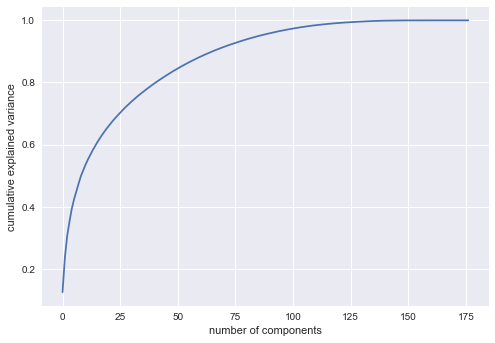

In [16]:
pca = PCA().fit(df_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**PCA: Features the explain variance **

In [17]:
pca2=PCA(n_components=2)
c = pca2.fit(df_std)
d = c.components_
df_d = pd.DataFrame(d[:,:])
df10 = df_d.T
df10.index=X.columns

In [18]:
df10.rename(columns={0: 'PC-1'}, inplace=True)
df10.rename(columns={1: 'PC-2'}, inplace=True)
df10['PC-1'] = df10['PC-1'].abs()
df10['PC-2'] = df10['PC-2'].abs()
df11 = df10.sort('PC-1', ascending=False)
df11

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,PC-1,PC-2
pacbio.alt_reason_alignmentScore,0.173924,0.032525
pacbio.alt_count,0.173924,0.032525
pacbio.alt_alnScore_std,0.167529,0.024135
Ill250.alt_alnScore_mean,0.166885,0.028747
pacbio.alt_insertSize_std,0.166563,0.023761
pacbio.ref_count,0.164486,0.029330
pacbio.ref_reason_alignmentScore,0.164486,0.029330
Ill250.alt_insertSize_mean,0.162209,0.027899
Ill250.alt_insertSize_std,0.162045,0.032824
Ill250.alt_count,0.154924,0.091253


**TSNE**

In [19]:
ncomps = 87
pca=PCA(n_components=ncomps)
Y = pca.fit_transform(df_std)
dfpca = pd.DataFrame(Y, columns=['c{}'.format(c) for c in range(ncomps)], index=df.index)

In [39]:
tsne = TSNE(n_components=2, random_state=0)
Z = tsne.fit_transform(dfpca)
dftsne = pd.DataFrame(Z, columns=['x','y'], index=dfpca.index)

In [21]:
#Size Bins
bins = [20,50,100,300,400,500,1000,6000,500000]
df['Size'] = df['Size'].abs()
group_names_size = ['20-49', '50-99', '100-299', '300-399', '400-499', '500-999', '1000-5999', '6000+']
df['size_bin'] = pd.cut(df['Size'], bins, labels=group_names_size)
dftsne['size_bin'] = df['size_bin']

In [26]:
p = Scatter(dftsne, x='x', y='y', color='size_bin', title='HG002 DEL:Size', palette=palettes.Category20[20], legend="top_left")
show(p)

In [23]:
#PB Alt Count Bins
df['pacbio.alt_count'].replace(-1, 0, inplace=True)
# df.sort('pacbio.alt_count', ascending=False)
bins = [-1,25, 50, 75, 100]
group_names_size = ['0-25', '25-50', '50-75', '75-100']
df['pacbio.alt_count_bin'] = pd.cut(df['pacbio.alt_count'], bins, labels=group_names_size)
# df['pacbio.alt_count_bin'] = df['pacbio.alt_count'].apply(lambda x: ('0-50' if x == 0))
dftsne['PB_altcount'] = df['pacbio.alt_count_bin']

In [24]:
dftsne.head(1)

,x,y,size_bin,PB_altcount
0,34.58939,-57.526924,6000+,25-50


In [25]:
p = Scatter(dftsne, x='x', y='y', color='PB_altcount', title='Pacbio Alt Count', legend="top_left")
show(p)

In [69]:
dftsne['GTcons'] = df2['GTcons']

In [ ]:
p = Scatter(dftsne, x='x', y='y', color='GTcons', title='GTcons', legend="top_left")
show(p)

In [ ]:
df.to_csv('df123.csv', index=False)

In [ ]:
#PB Alt Count Bins
df['pacbio.alt_count'].replace(-1, 0, inplace=True)
# df.sort('pacbio.alt_count', ascending=False)
bins = [-1,25, 50, 75, 100]
group_names_size = ['0-25', '25-50', '50-75', '75-100']
df['pacbio.alt_count_bin'] = pd.cut(df['pacbio.alt_count'], bins, labels=group_names_size)
# df['pacbio.alt_count_bin'] = df['pacbio.alt_count'].apply(lambda x: ('0-50' if x == 0))
dftsne['PB_altcount'] = df['pacbio.alt_count_bin']

In [ ]:
#Ill250 : alt_alnScore_mean
bins = [0,25,50, 100, 500, 1000]
group_names_size = ['0-25', '25-50', '50-100', '100-500', '500-1000']
df['Ill250.alt_alnScore_mean_bin'] = pd.cut(df['Ill250.alt_alnScore_mean'], bins, labels=group_names_size)
dftsne['Ill250'] = pd.cut(df['Ill250.alt_alnScore_mean'], bins, labels=group_names_size)

In [ ]:
#Ill250 Alt Count
bins = [-1,25, 50, 75, 100, 500, 1000]
group_names_size = ['0-25', '25-50', '50-75', '75-100', '100-500', '500-1000']
df['Ill250.alt_count_bin'] = pd.cut(df['Ill250.alt_count'], bins, labels=group_names_size)
# df['pacbio.alt_count_bin'] = df['pacbio.alt_count'].apply(lambda x: ('0-50' if x == 0))
dftsne['Ill250alt_count'] = df['Ill250.alt_count_bin']

In [ ]:
p = Scatter(dftsne, x='x', y='y', color='Ill250alt_count', title='Ill250 : Alt Count', legend="top_left")
show(p)

In [ ]:
dftsne.to_csv('df123.csv',index=False)

**DBSCAN**

In [72]:
ncomps = 87
pca=PCA(n_components=ncomps)
Y = pca.fit_transform(df_std)
dfpca = pd.DataFrame(Y, columns=['c{}'.format(c) for c in range(ncomps)], index=df.index)

In [73]:
tsne = TSNE(n_components=2, random_state=0)
Z = tsne.fit_transform(dfpca)
dftsne = pd.DataFrame(Z, columns=['x','y'], index=dfpca.index)

In [74]:
# DBSCAN with tSNE data
dbscan = DBSCAN()
labels = dbscan.fit_predict(Z)
print("Unique labels: {}".format(np.unique(labels)))
dftsne['clusterLabel'] = labels

Unique labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]


In [103]:
dbscan = DBSCAN(eps=2)
labels = dbscan.fit_predict(Z)
print("Unique labels: {}".format(np.unique(labels)))
dftsne['clusterLabel'] = labels


df['clusterLabel'] = labels

Unique labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78]


In [104]:
p = Scatter(dftsne, x='x', y='y', color='clusterLabel', title='Clusters', palette=palettes.Category20[20], legend="top_left")
show(p)

In [30]:
output_notebook()

Loading BokehJS ...

In [31]:
sns.set_style("white")


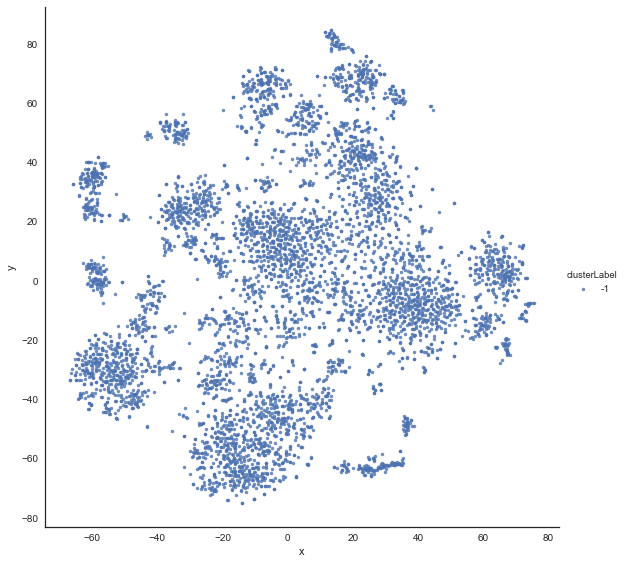

In [32]:

g = sns.lmplot("x", "y", data=dftsne, hue='clusterLabel', fit_reg=False, scatter_kws={"marker": "D","s": 12}, legend=True, size=8)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show(g)

In [33]:
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



In [99]:
dftsne['Size'] = df['Size'].abs()
dftsne['GTcons'] = df2['GTcons']

In [35]:
#Specify data source
source = bokeh.models.ColumnDataSource(dftsne)
# What pops up on hover?
tooltips = [('clusterLabel', '@clusterLabel'),
           ('Size', '@Size')]

# Make the hover tool
hover = bokeh.models.HoverTool(tooltips=tooltips)

# Create figure
p = bokeh.plotting.figure(background_fill='#DFDFE5', plot_width=650, 
                          plot_height=450)

p.xgrid.grid_line_color = 'white'
p.ygrid.grid_line_color = 'white'

# Add the hover tool
p.add_tools(hover)

# Populate glyphs
# p.scatter(x='x', y='y', color='Tech_Label_Agreement', size=7, alpha=0.5, source=source)

# bokeh.io.show(p)

scatter = bch.Scatter(dftsne, x='x', y='y',
                      color='clusterLabel',
                      legend=False,
                      palette=palettes.Category20[20],
                      tooltips=tooltips)

bch.show(scatter)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning:

Plot.background_fill was deprecated in Bokeh 0.11.0 and will be removed, use Plot.background_fill_color instead.



In [36]:
p = Scatter(dftsne, x='x', y='y', color='size_bin', palette=palettes.Category20[20], title='Size', legend="top_left")
show(p)

In [107]:
#Specify data source
source = bokeh.models.ColumnDataSource(dftsne)
# What pops up on hover?
tooltips = [('clusterLabel', '@clusterLabel'),
           ('Size', '@Size')]

# Make the hover tool
hover = bokeh.models.HoverTool(tooltips=tooltips)

# Create figure
p = bokeh.plotting.figure(background_fill='#DFDFE5', plot_width=650, 
                          plot_height=450)

p.xgrid.grid_line_color = 'white'
p.ygrid.grid_line_color = 'white'

# Add the hover tool
p.add_tools(hover)

# Populate glyphs
# p.scatter(x='x', y='y', color='Tech_Label_Agreement', size=7, alpha=0.5, source=source)

# bokeh.io.show(p)

scatter = bch.Scatter(dftsne, x='x', y='y',
                      color='clusterLabel',
                      legend=False,
                      palette=palettes.Category20[20],
                      tooltips=tooltips)

bch.show(scatter)
output_file("DBSCAN_cluster_size.html")



/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning:

Plot.background_fill was deprecated in Bokeh 0.11.0 and will be removed, use Plot.background_fill_color instead.



INFO:bokeh.core.state:Session output file 'DBSCAN_cluster_size.html' already exists, will be overwritten.


In [ ]:
df2['Cluster_Labels'] = dftsne['clusterLabel']

In [ ]:
# df2.drop(['Cluster_Labels'], axis=1, inplace = True)

In [ ]:
df2.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/Data_Cluster.csv', index=False)

In [ ]:
df3 = pd.value_counts(df2['Cluster_Labels'].values, sort=False)

In [ ]:
df4 = pd.DataFrame(df3)
df4['ClusterID'] = df4.index
df4.rename(columns={0: 'Cluster_Count'}, inplace=True)
df4.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/tsne_clusterCount.csv', index=False)